In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
to_compare = [
    # pd.read_csv('sota1.csv'),
    # pd.read_csv('sota2.csv'),
    # pd.read_csv('test_ensemble.csv'),
    pd.read_csv('LDAM_roberta-large_original_4epoch/5_folds_submission.csv'),
    pd.read_csv('LDAM_roberta-large_original_4epoch_loss/5_folds_submission.csv'),
    pd.read_csv('LDAM_roberta-large_original_4epoch_auprc/5_folds_submission.csv'),
    pd.read_csv('ensemble.csv'),
]

exclude_label = lambda df: df[df['pred_label'].apply(lambda x: x != 'no_relation')]
to_compare = list(map(exclude_label, to_compare))

# collect_label = lambda df: df[df['pred_label'].apply(lambda x: x == 'org:top_members/employees')]
# to_compare = list(map(collect_label, to_compare))

froms = []
for n, labels in enumerate(to_compare):
    froms += [f'comp_{n}'] * len(labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'org:product'),
  Text(1, 0, 'per:alternate_names'),
  Text(2, 0, 'org:top_members/employees'),
  Text(3, 0, 'per:employee_of'),
  Text(4, 0, 'per:spouse'),
  Text(5, 0, 'org:members'),
  Text(6, 0, 'org:dissolved'),
  Text(7, 0, 'per:place_of_death'),
  Text(8, 0, 'per:colleagues'),
  Text(9, 0, 'org:place_of_headquarters'),
  Text(10, 0, 'per:place_of_residence'),
  Text(11, 0, 'org:member_of'),
  Text(12, 0, 'per:title'),
  Text(13, 0, 'per:siblings'),
  Text(14, 0, 'per:date_of_birth'),
  Text(15, 0, 'per:schools_attended'),
  Text(16, 0, 'per:origin'),
  Text(17, 0, 'per:place_of_birth'),
  Text(18, 0, 'org:number_of_employees/members'),
  Text(19, 0, 'per:children'),
  Text(20, 0, 'per:product'),
  Text(21, 0, 'org:political/religious_affiliation'),
  Text(22, 0, 'org:alternate_names'),
  Text(23, 0, 'per:other_family'),
  Text(24, 0, 

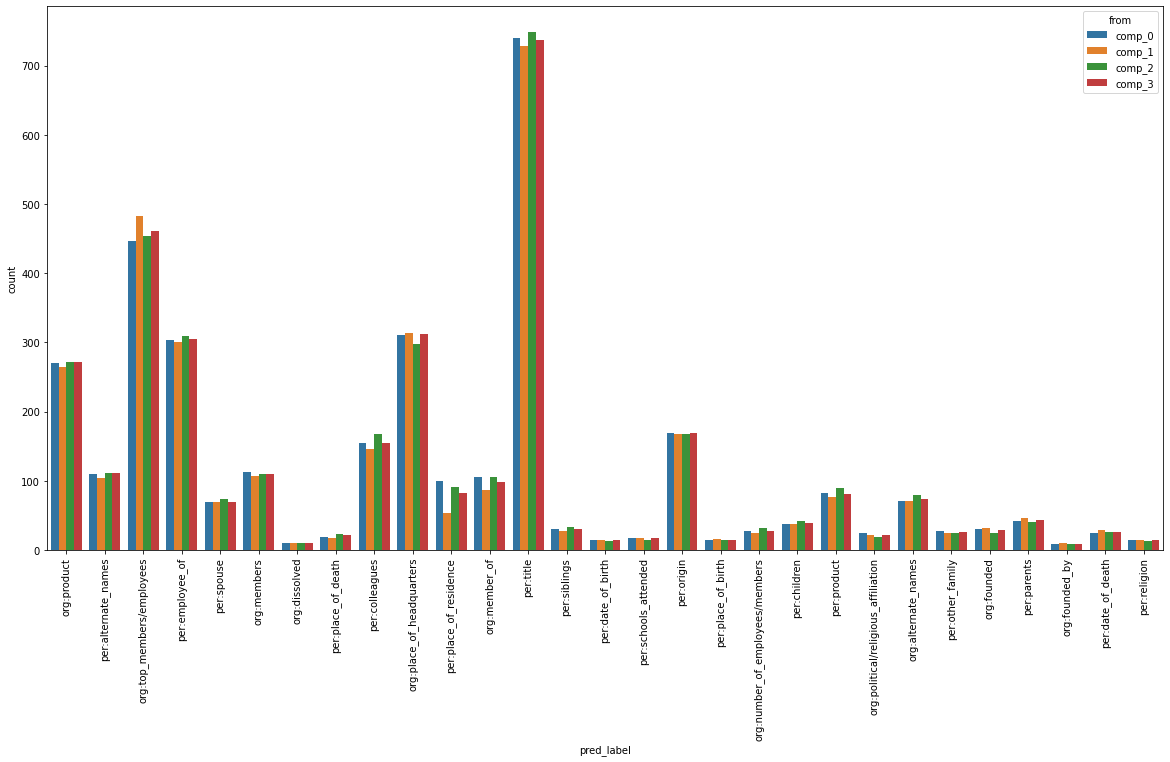

In [101]:
concated = pd.concat(to_compare, ignore_index=True)

df = pd.DataFrame({
    'pred_label': pd.concat(list(map(lambda x: x['pred_label'], to_compare)), ignore_index=True),
    'from': froms
})

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot = sns.countplot(x='pred_label', data=df, hue='from', ax=ax)
plt.xticks(rotation=90)